# Script Contents
#### .01 Import Libraries & Data
#### .02 Comparing Scaled & Unscaled Data
#### .03 Creating and Running the ANN Model

## .01 Import Libraries & Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [5]:
path = r'C:\Users\jacks\ClimateWins\02 Data Sets'

In [7]:
# Import scaled weather data
df_scaled = pd.read_pickle(os.path.join(path, 'weather_scaled.pkl'))

In [9]:
# Import the pleasant weather answers data
df_pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [11]:
# We only need to use the tempurature data from the scaled weather data
# Reduce to temp variables and exclude all Gdansk, Roma,Tours columns
df_temp = df_scaled[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [13]:
# Create X and y dataframes and drop date/month columns
X = df_temp.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis=1)

In [15]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [17]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


## .02 Comparing Scaled and Unscaled Data

In [31]:
# View the first 5 rows of the X_train data
X_train[:5]

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,1.359088,1.116341,1.354285,1.116763,0.994564,1.114386,1.265281,1.421337,1.111177,0.993200,...,0.669744,1.074927,1.161311,0.961902,0.143873,0.083463,0.129636,1.464779,1.584476,1.174547
20472,-1.655817,-1.458775,-1.784113,-1.845364,-1.880757,-1.726787,-1.769677,-2.028759,-1.678407,-1.981379,...,-1.997412,-1.806216,-1.701992,-1.879433,-1.771976,-1.839458,-1.683417,-0.007287,-0.000520,-0.004530
18269,-1.655817,-1.887961,-1.646665,-1.073622,-0.896413,-1.068831,-1.428538,-1.239783,-1.555788,-2.361113,...,-2.375349,-1.323588,-1.172281,-1.454697,-1.946144,-2.360249,-1.782310,-2.921377,-3.225169,-2.190135
7713,-1.601495,-1.550743,-1.486309,-1.357351,-1.064788,-1.487530,-1.205034,-1.092686,-1.249240,-1.554179,...,-1.425107,-2.318095,-2.160121,-2.435983,-1.187269,-1.278606,-1.342783,-1.178932,-0.656381,-1.126091
21958,-0.582946,-0.692371,-0.180552,-0.676402,-0.883461,-0.570380,-0.652154,-0.718257,-0.554399,-0.683956,...,-0.539655,-1.411339,-1.329763,-1.454697,-0.789171,-0.664340,-0.793373,-0.007287,-0.000520,-0.004530


In [35]:
# View the first 5 rows of the X_test data
X_test[:5]

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
19955,0.639313,0.687155,0.506688,1.366445,1.357217,1.214077,0.900615,1.314357,0.937467,0.407778,...,1.047681,0.840926,0.975196,0.668981,0.927629,1.098338,0.744975,-0.007287,-0.000520,-0.004530
7729,-1.248398,-0.998933,-1.429039,-1.402747,-1.375633,-1.208398,-1.369721,-1.533978,-1.310550,-1.364312,...,-1.284731,-1.323588,-1.358396,-1.264298,-1.162388,-1.145070,-1.079066,-1.479353,-1.257587,-1.471186
10815,1.331927,1.453558,1.136659,1.252953,1.007516,1.184170,1.194700,1.113770,1.223578,1.056489,...,0.637349,1.148053,0.946563,1.313407,1.363049,1.539007,1.305373,1.765200,1.967062,1.318337
3125,0.680055,0.058704,0.781585,-0.029500,0.411729,-0.201526,0.477133,0.538754,0.590046,0.740045,...,0.993690,-0.051205,-0.069910,-0.034030,0.741020,0.898033,0.701022,1.254484,1.092581,1.260821
18985,-0.827397,-0.922292,-0.684528,-1.266557,-1.479248,-1.298119,-1.334431,-1.159549,-1.555788,-0.573200,...,-0.766417,-0.621584,-1.014799,-0.209783,-0.515478,-0.557511,-0.441750,-0.007287,-0.000520,-0.004530


In [27]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

#View the first 5 rows of the scaled X-train data to see if there is a difference from the unscaled data
print(X_train_sc[:5])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


In [38]:
#View the first 5 rows of the scaled X-test data to see if there is a difference from the unscaled data
print(X_test_sc[:5])

[[ 0.63517615  0.68477796  0.5028251   1.36368407  1.35429066  1.21211108
   0.89604615  1.30997362  0.93339909  0.40143564  0.42730139  0.51607291
   0.27145545  0.03899088  0.59415046  0.41127144  0.16460362  0.45058717
  -0.01359355 -0.01005412 -0.00955445  0.93938388  1.17188055  0.95579151
   0.30271007  0.27633908  0.52287275  1.32713725  1.27847368  1.31658252
   0.74805041  1.12500597  0.37702047  0.80534301  0.81154899  1.0442326
   0.838288    0.97308283  0.66643812  0.92317321  1.09432218  0.7401904
  -0.0139084  -0.0077553  -0.00981651]
 [-1.2464403  -0.99659345 -1.42892932 -1.40459396 -1.37739132 -1.20933099
  -1.37286227 -1.53889107 -1.31293588 -1.36533941 -1.01648062 -1.42609017
  -1.25703647 -0.96192037 -1.1824679  -0.92711992 -1.21842726 -0.60984988
  -1.31220952 -1.72640592 -1.32727262 -1.41964151 -1.52006861 -1.42393993
  -1.11813688 -0.95369654 -1.09732761 -0.35694278 -0.3822163  -0.32870908
  -1.27153652 -1.82015906 -0.92034636 -1.32905795 -1.16661319 -1.28590061
 

### There do appear to be a small differences in the scaled versus unscaled data. The scaled data appears to fall within a narrower range than the unscaled data, as would be expected with scaled data. I will use the scaled data when running the ANN model since the data is more evenly weighted. 

## .03 Create and Run the ANN

In [51]:
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [53]:
# Finding the model's accuracy
y_pred = mlp.predict(X_train_sc)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_sc)
print(accuracy_score(y_pred_test, y_test))

0.46595398559144785
0.46793307772743115


C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


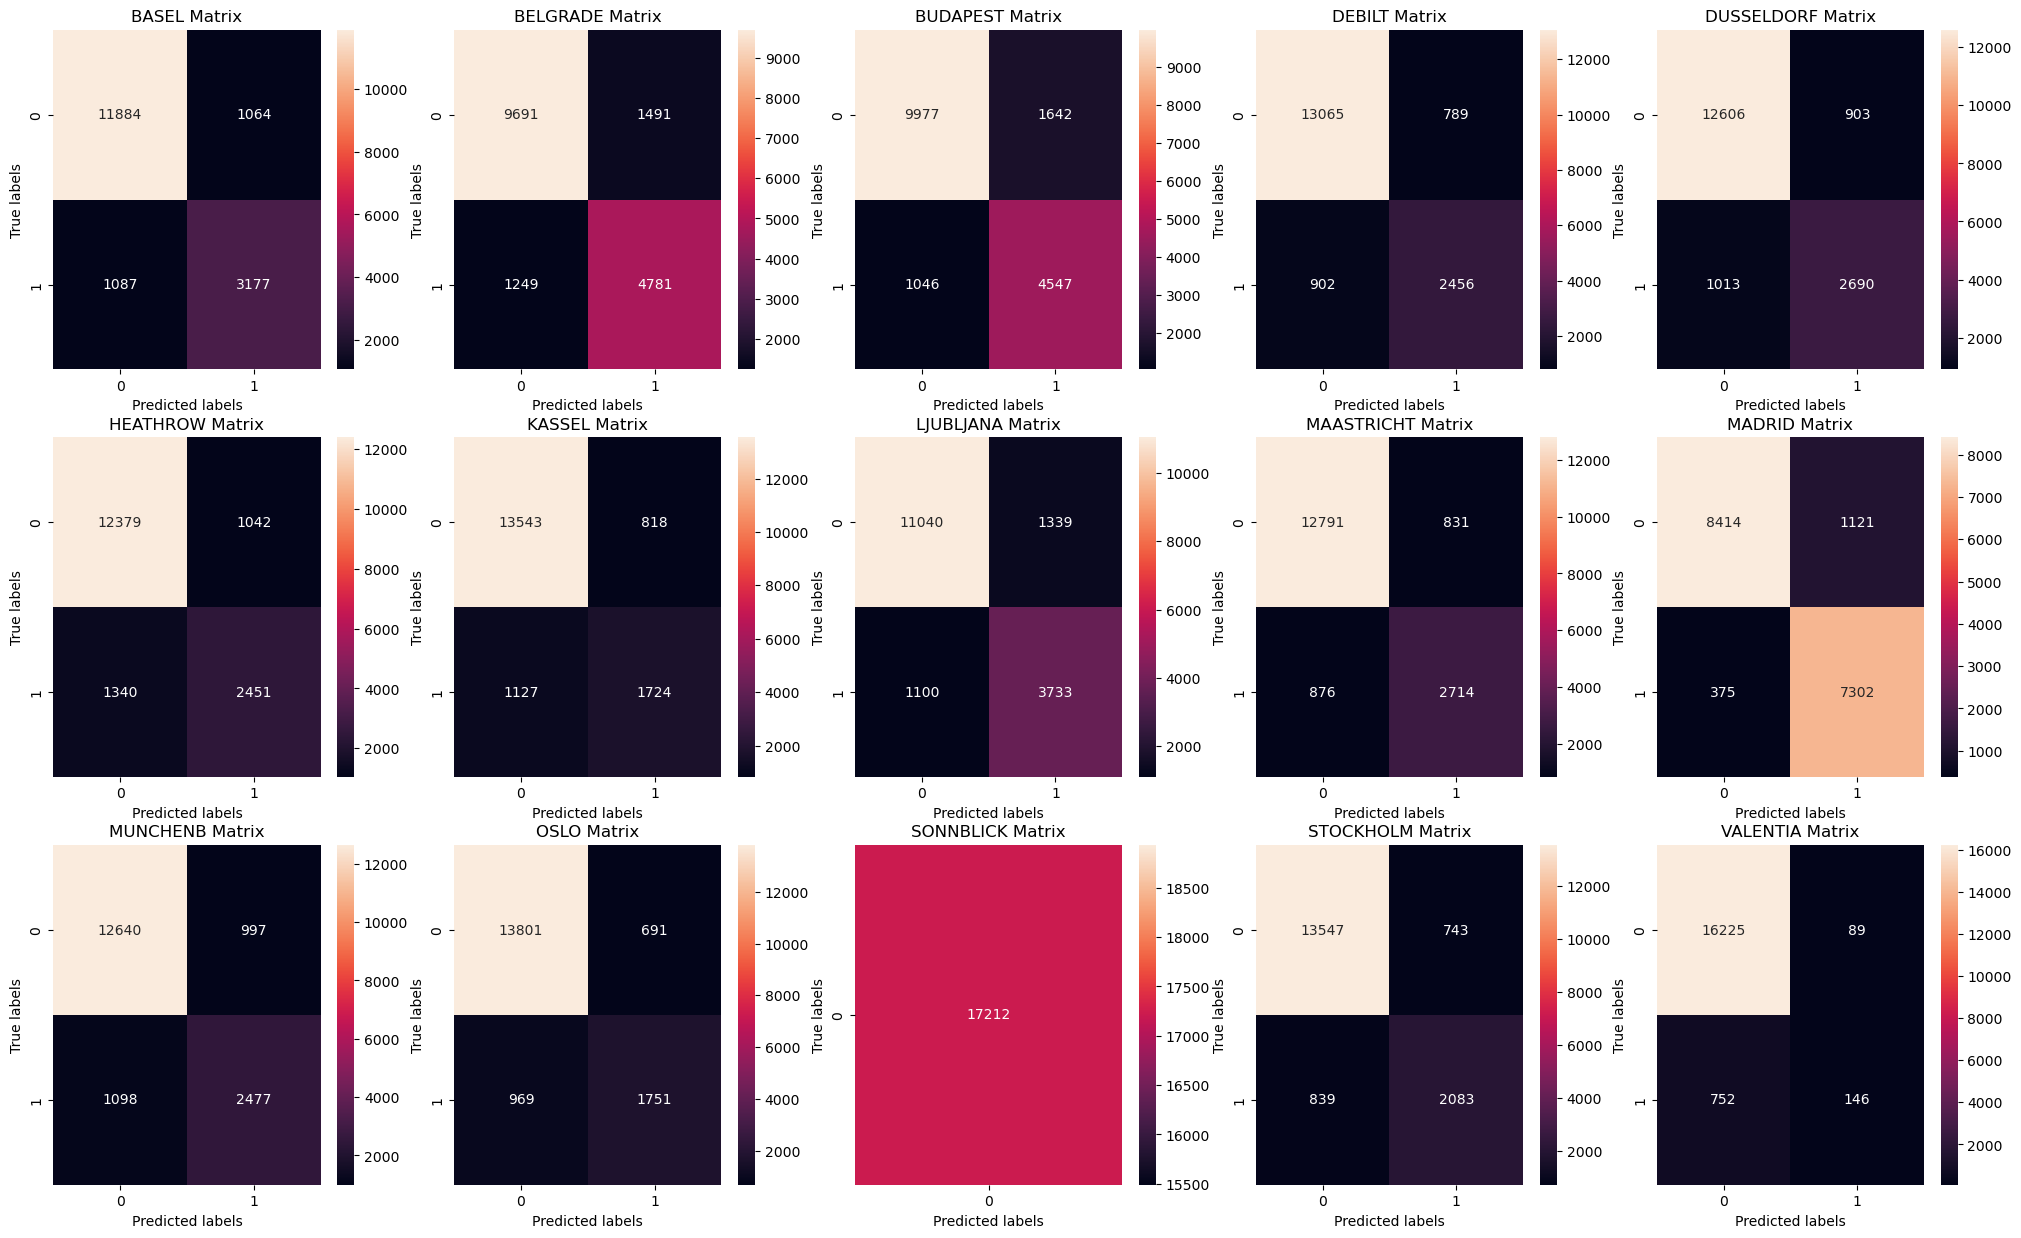

In [63]:
# Confusion matrix of training data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


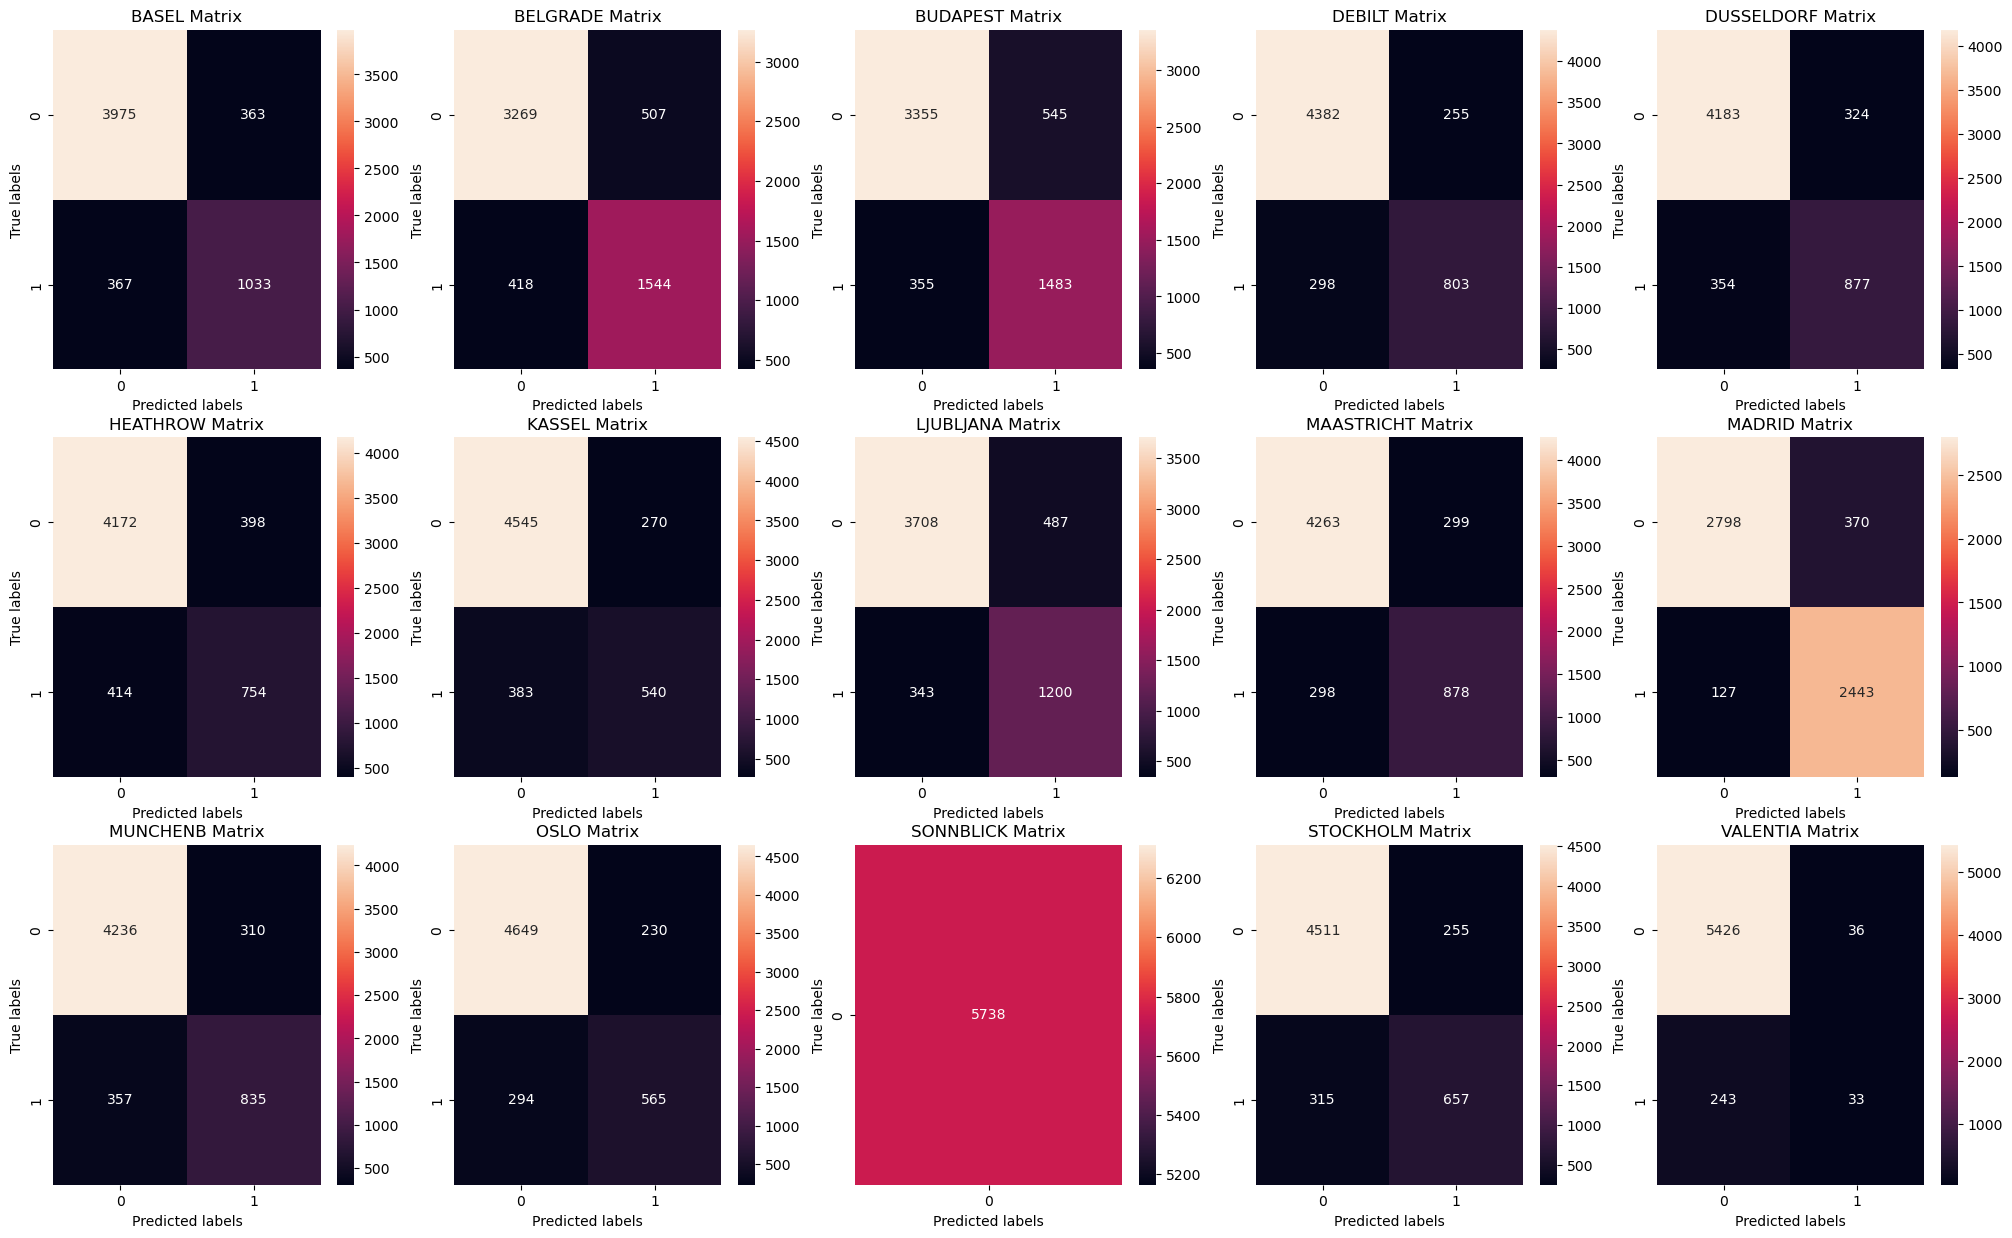

In [59]:
#Confusion matrix of testing data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [81]:
# Test 2 - Adjusting the number of nodes in hidden layer and increasing the max interations
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)

In [83]:
# Finding the model's accuracy
y_pred = mlp.predict(X_train_sc)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_sc)
print(accuracy_score(y_pred_test, y_test))

0.6141645363699745
0.5104566050888811


C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


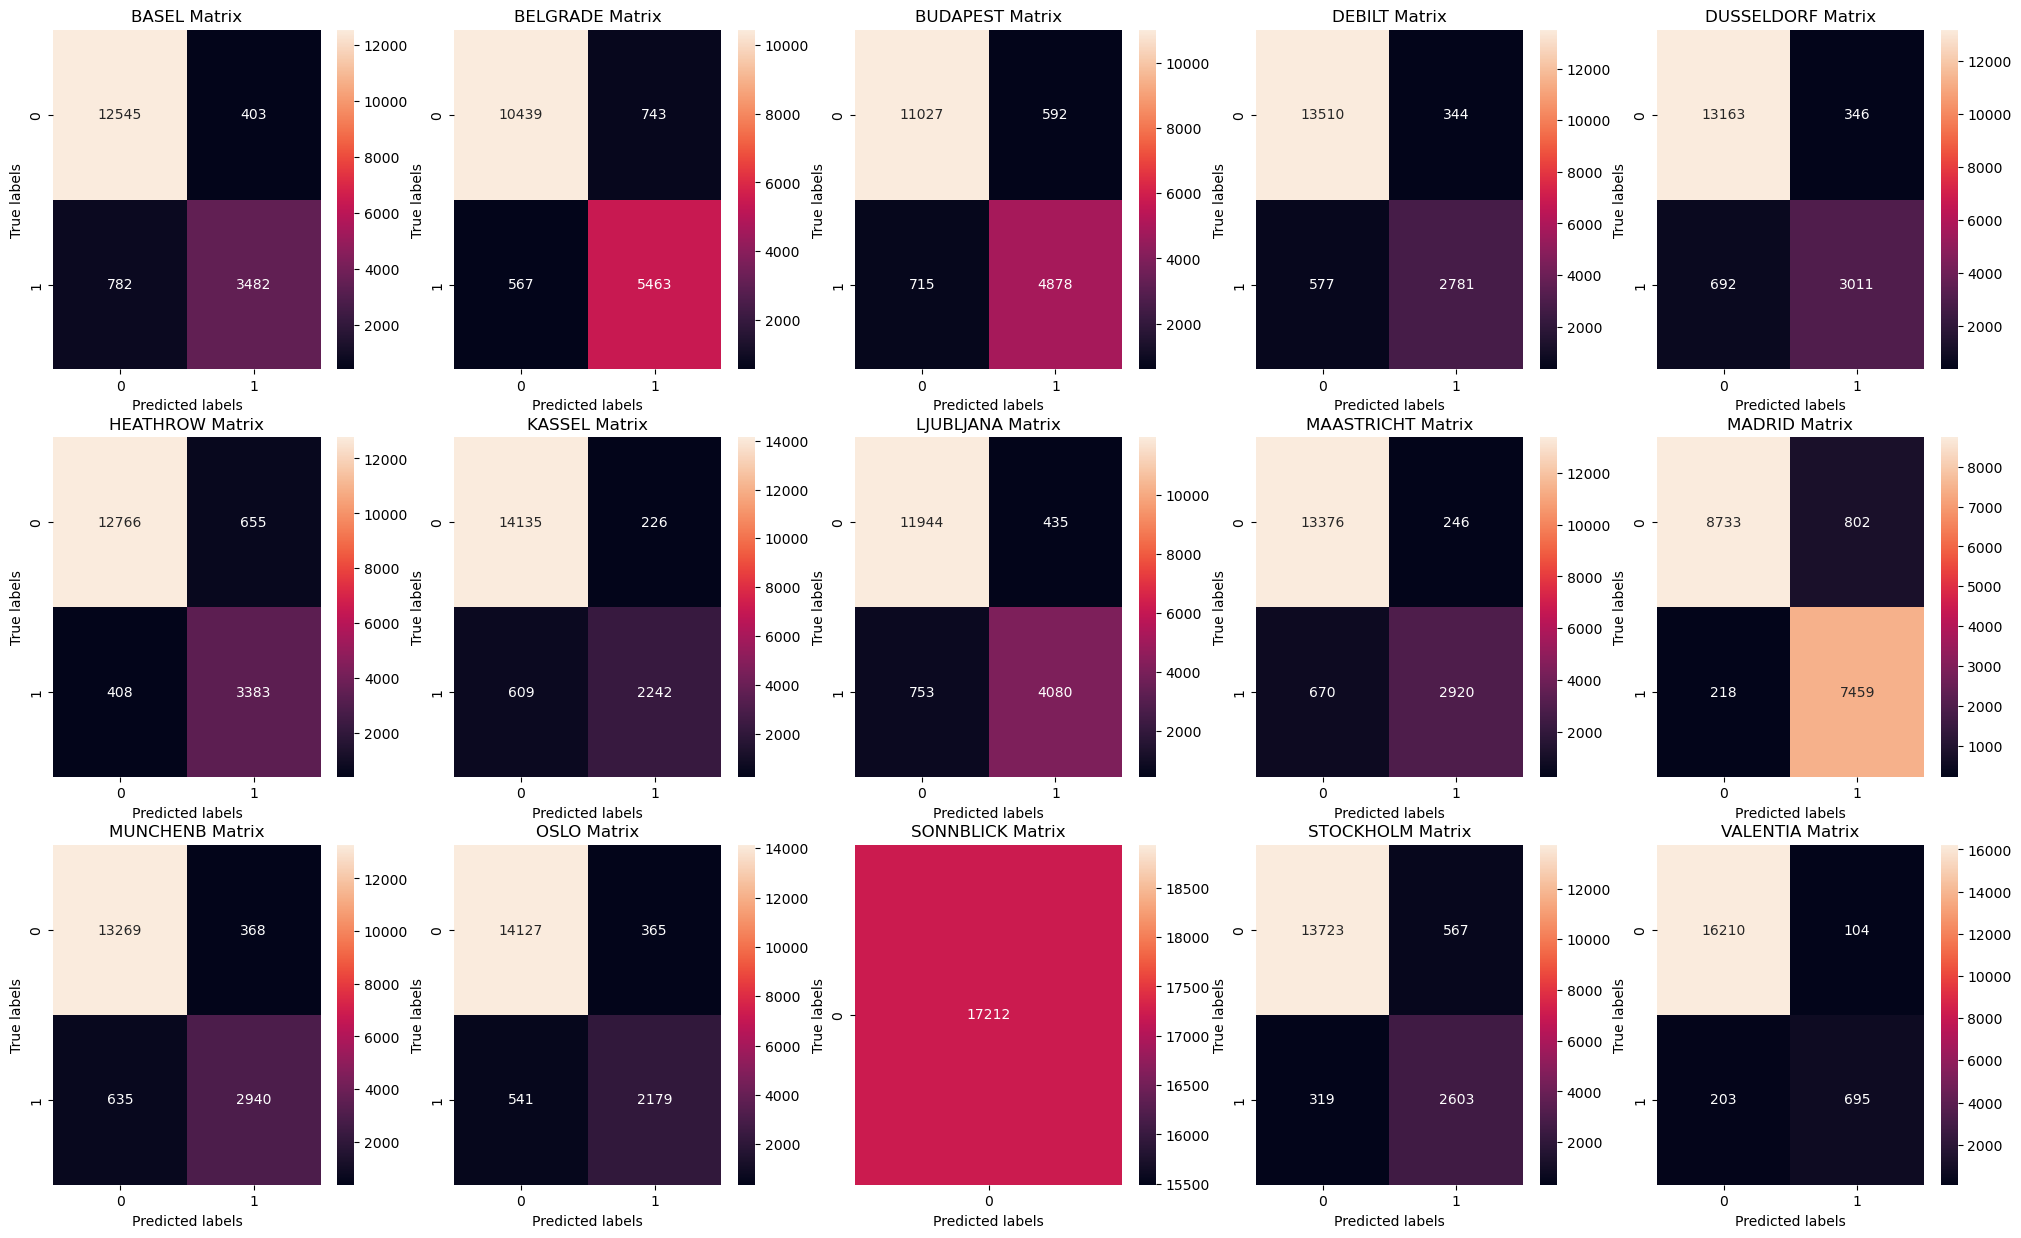

In [85]:
# Confusion matrix of training data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


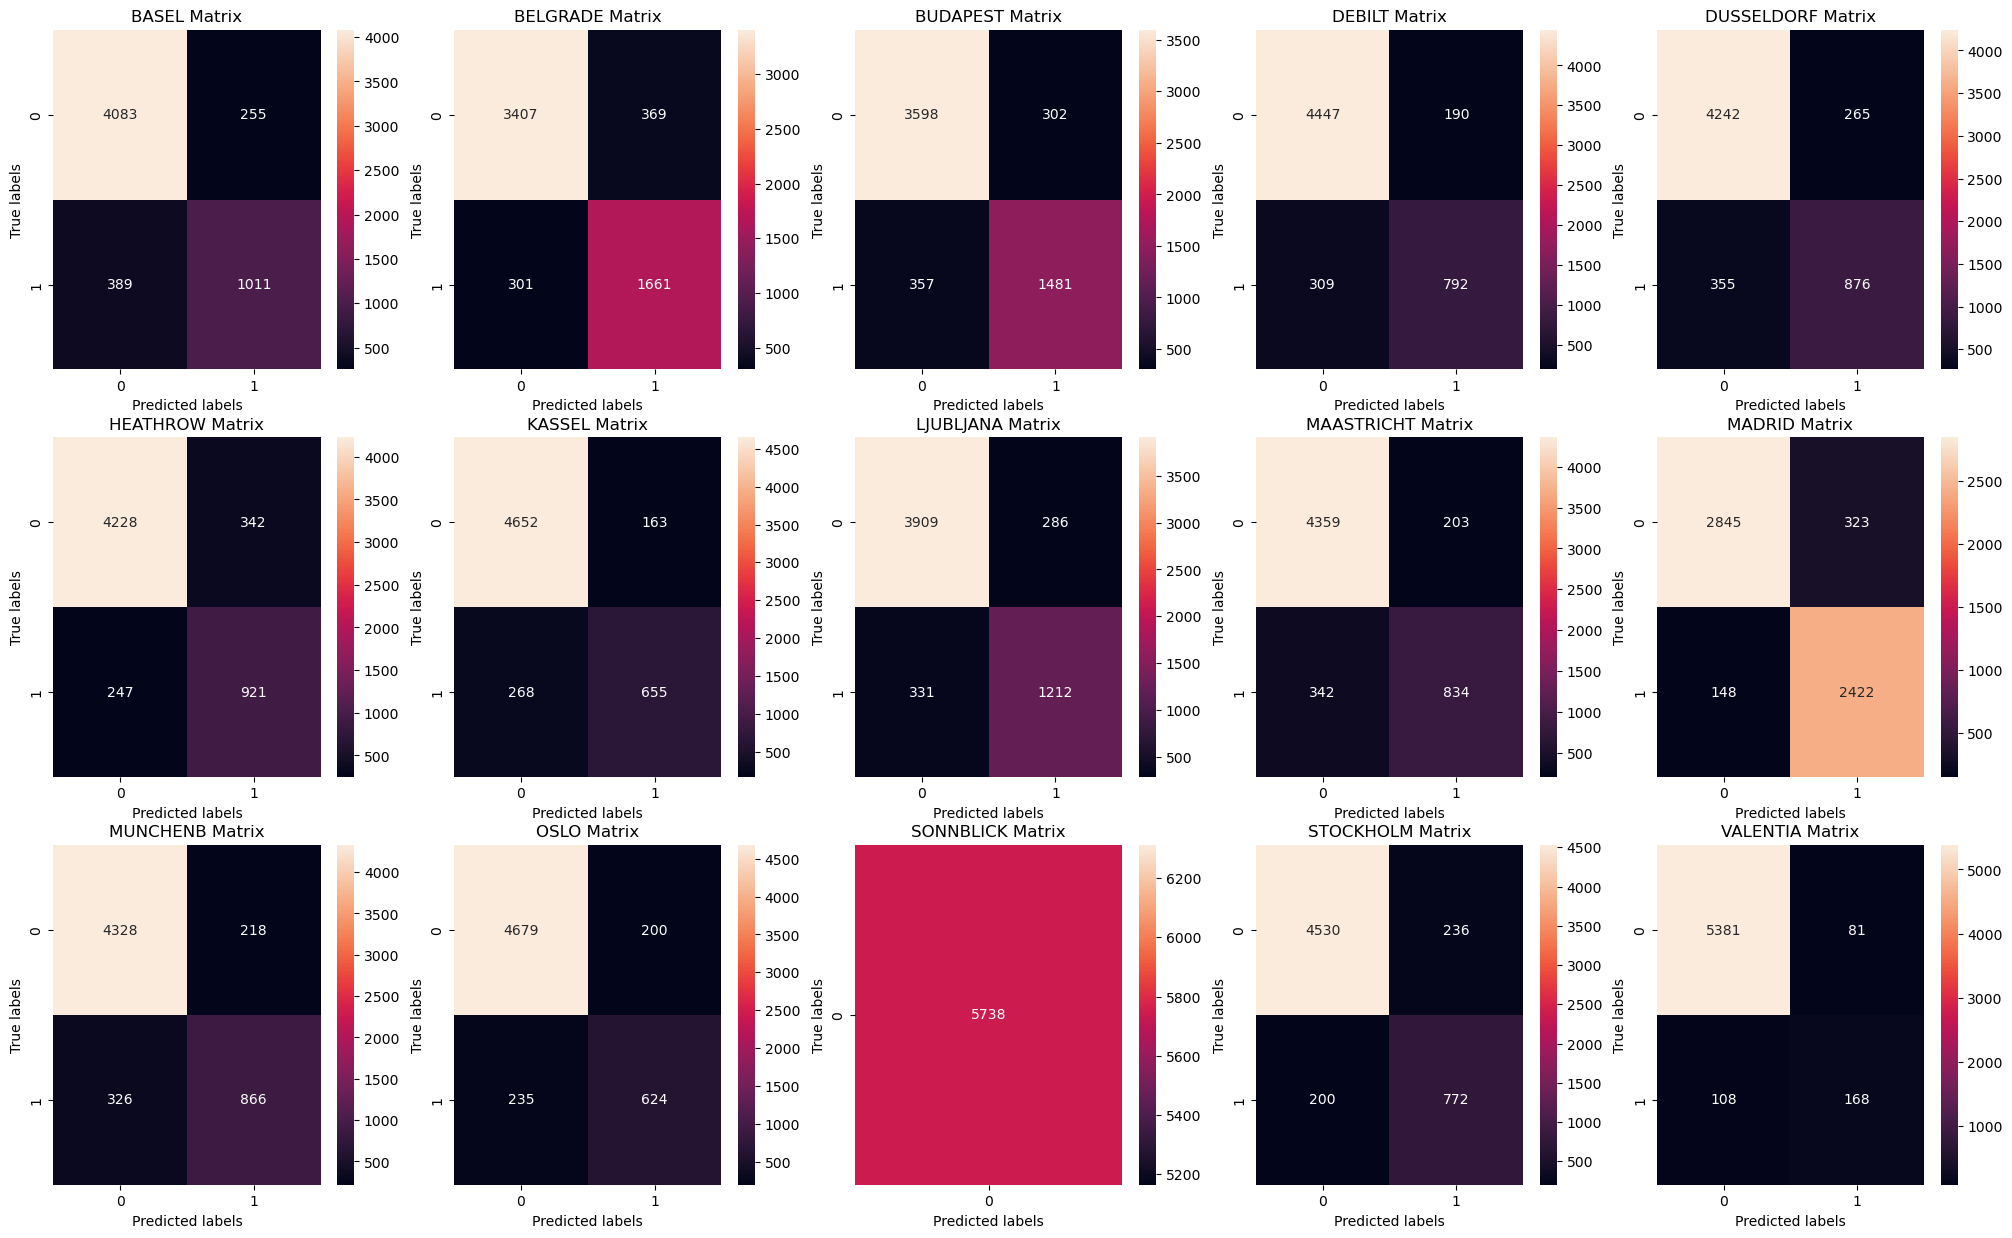

In [87]:
#Confusion matrix of testing data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [89]:
# Test 3 - Adding a hidden layer and increasing the tolerance
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, tol=0.001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, tol=0.001)

In [91]:
# Finding the model's accuracy
y_pred = mlp.predict(X_train_sc)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_sc)
print(accuracy_score(y_pred_test, y_test))

0.6597141529165699
0.49512025095852213


C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


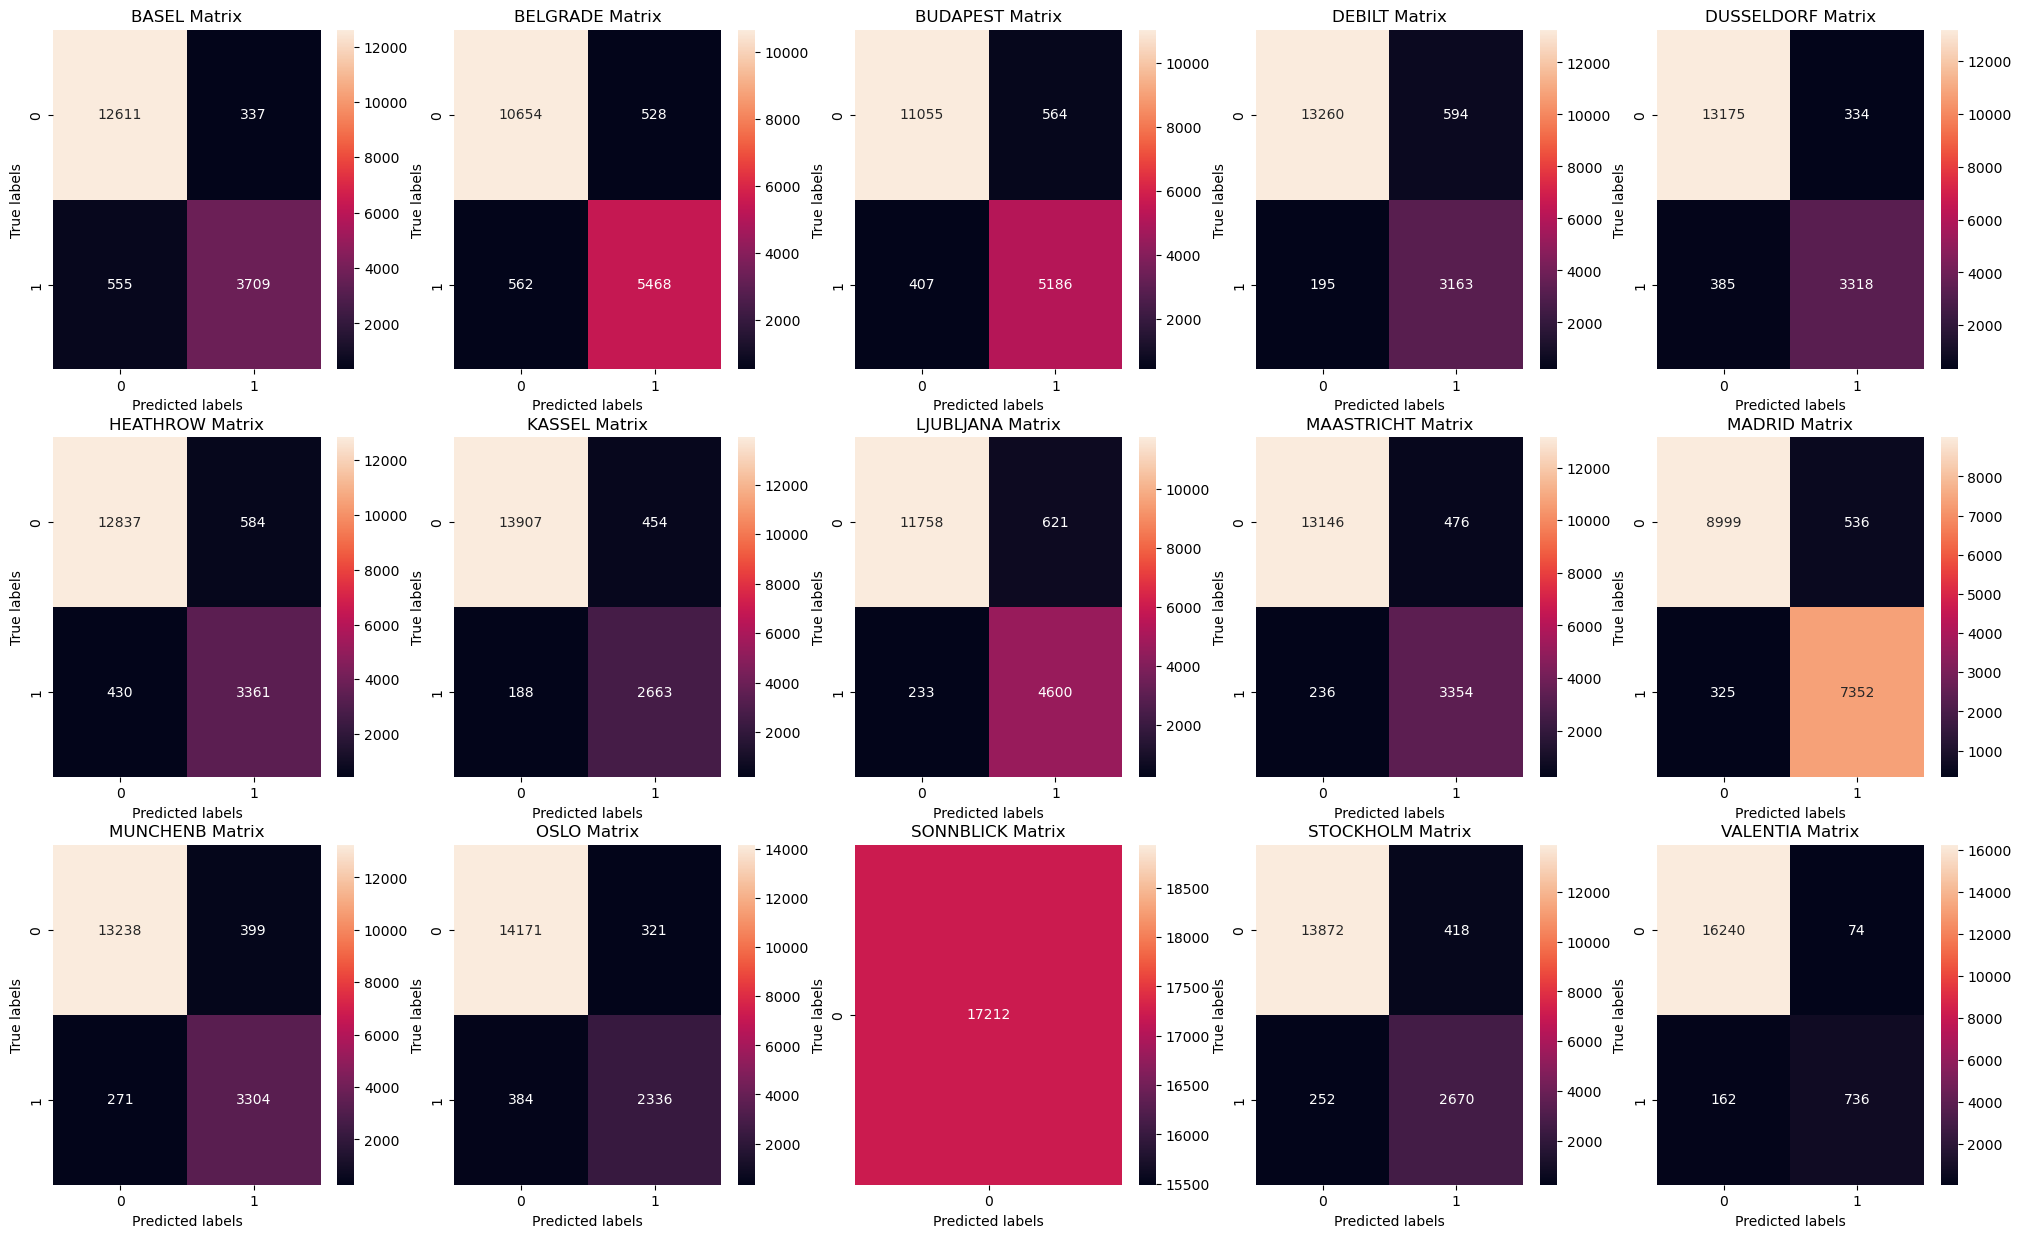

In [93]:
# Confusion matrix of training data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


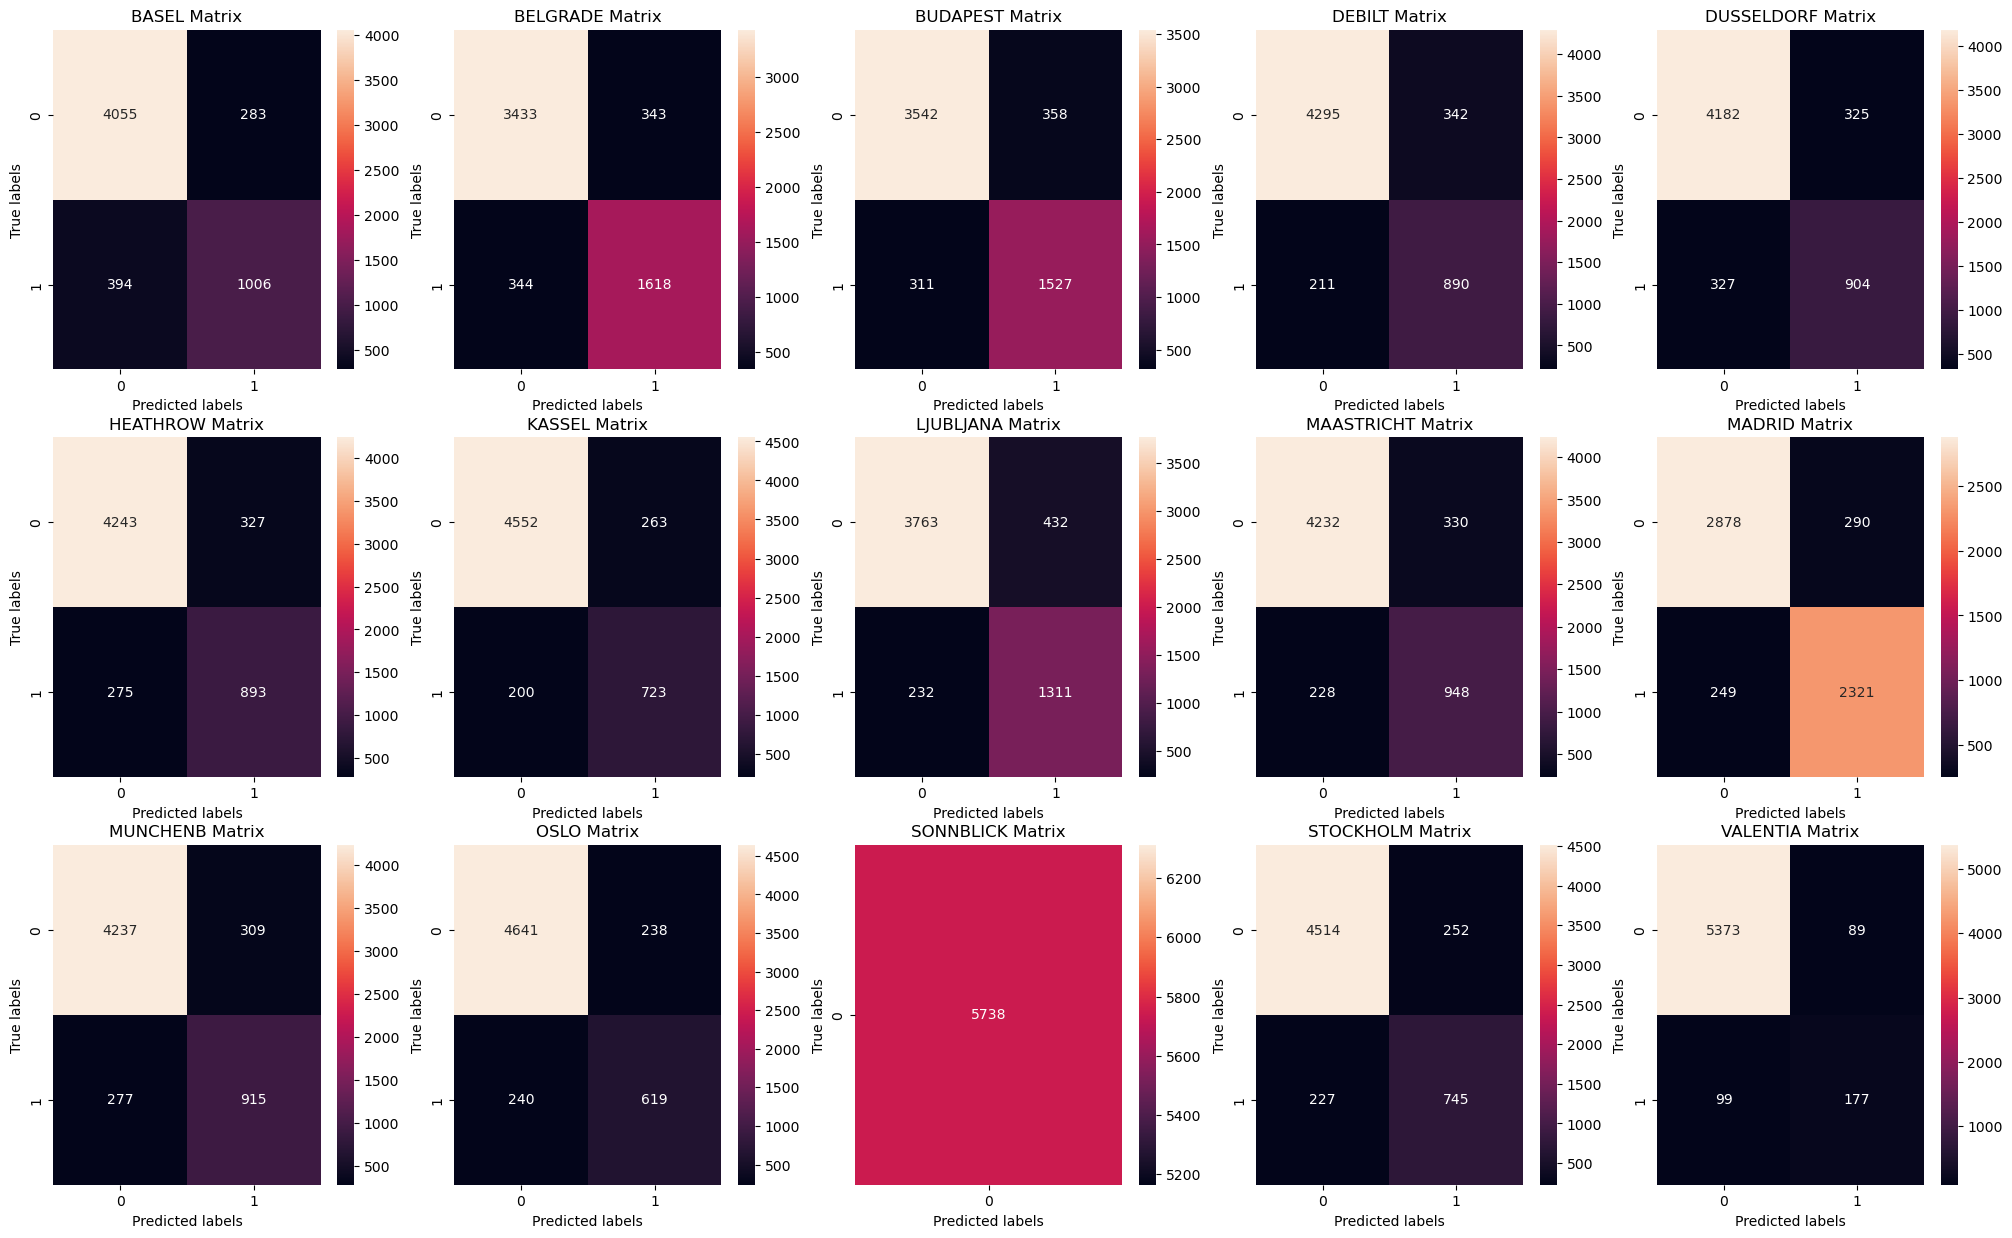

In [95]:
#Confusion matrix of testing data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [125]:
# Test 4 - Decreasing hidden layer node counts, increasing max iteration, and decreasing tolerance
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=2500, tol=0.00000000001)
#Fit the data to the model
mlp.fit(X_train_sc, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=2500, tol=1e-11)

In [127]:
# Finding the model's accuracy
y_pred = mlp.predict(X_train_sc)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test_sc)
print(accuracy_score(y_pred_test, y_test))

0.5715779688589356
0.5083652840711049


C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


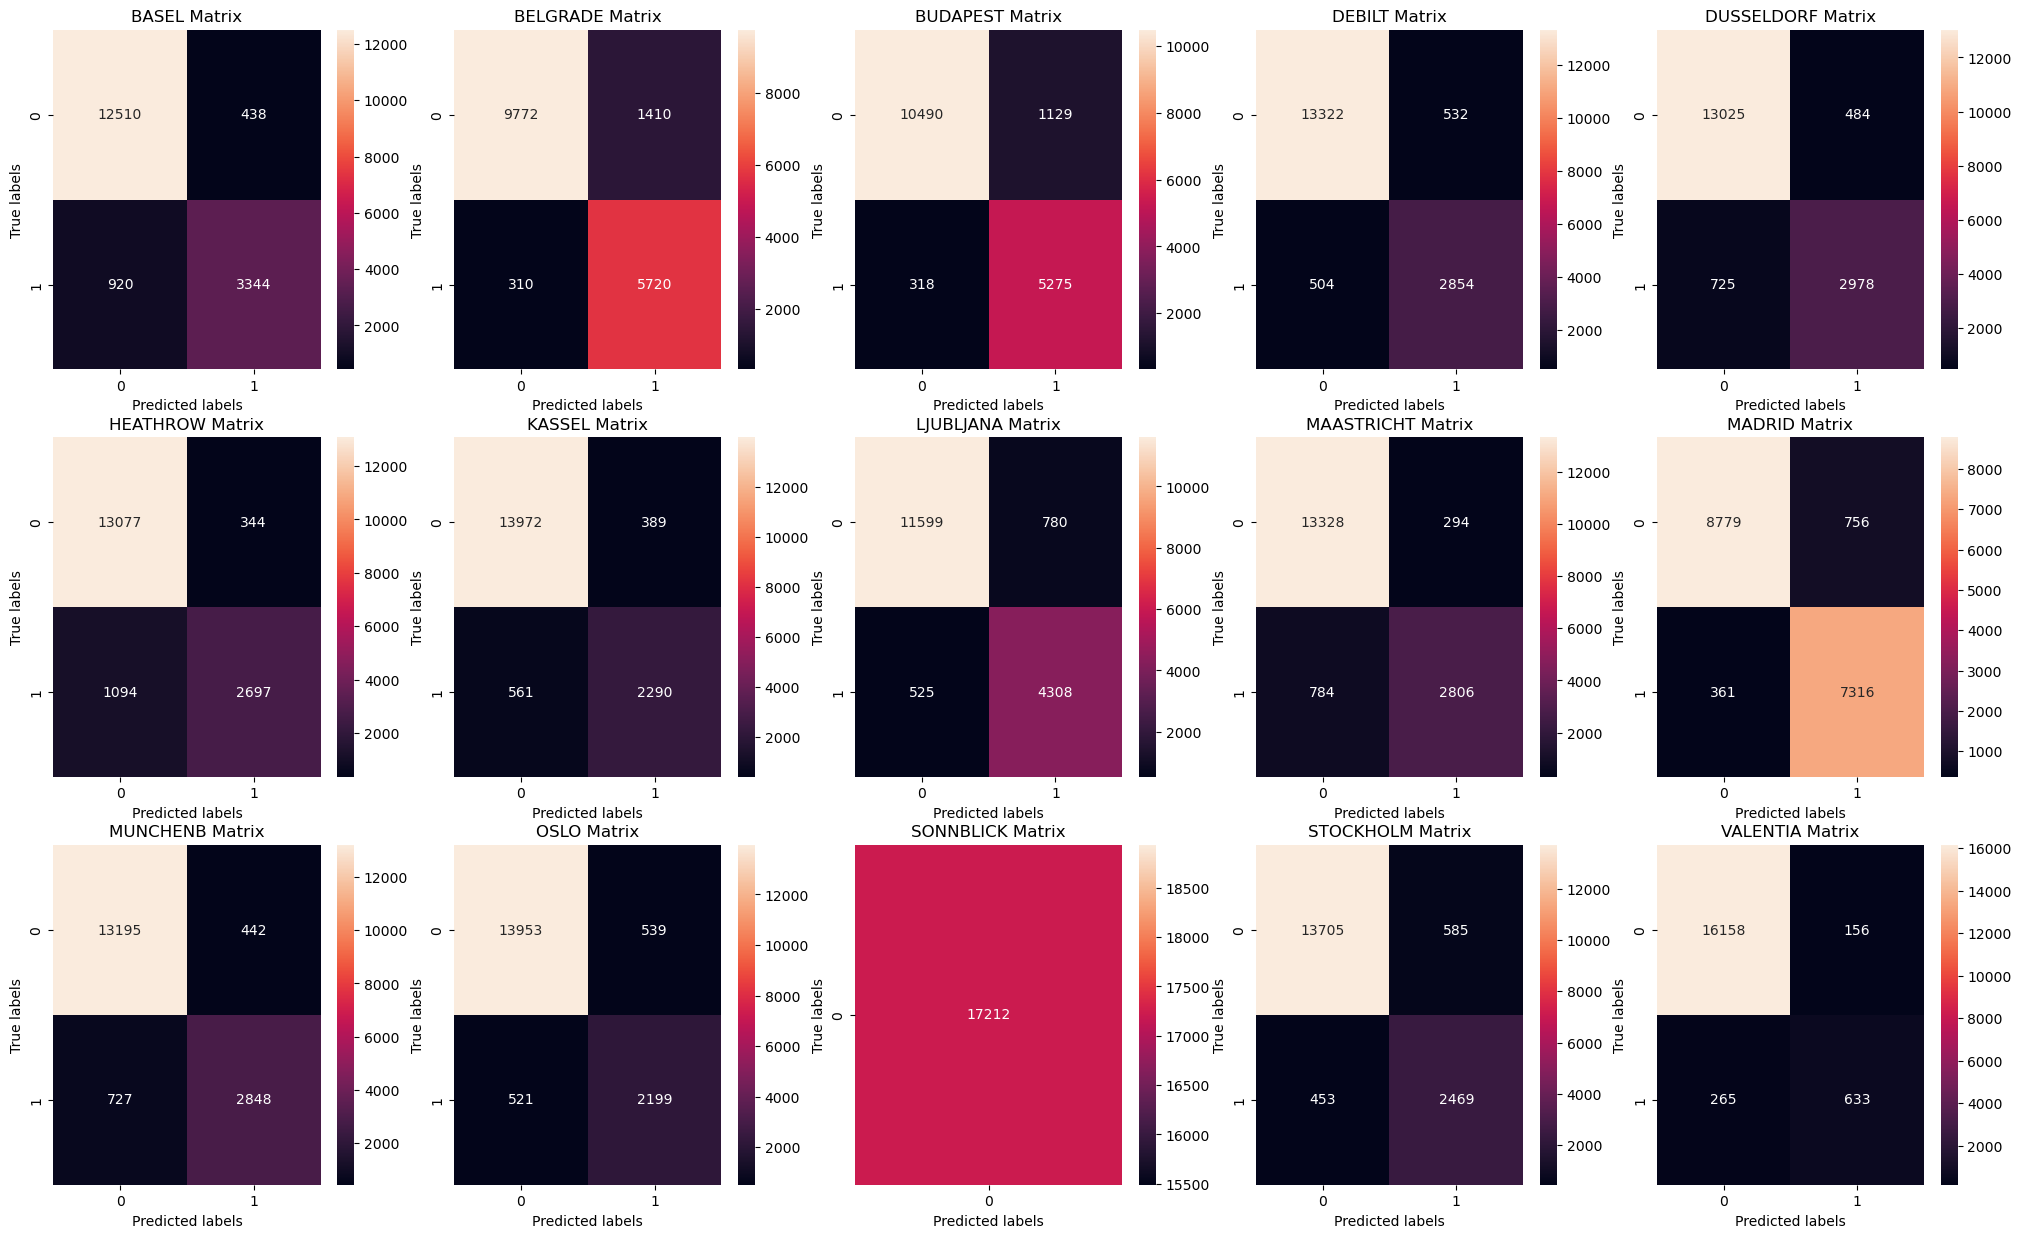

In [129]:
# Confusion matrix of training data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


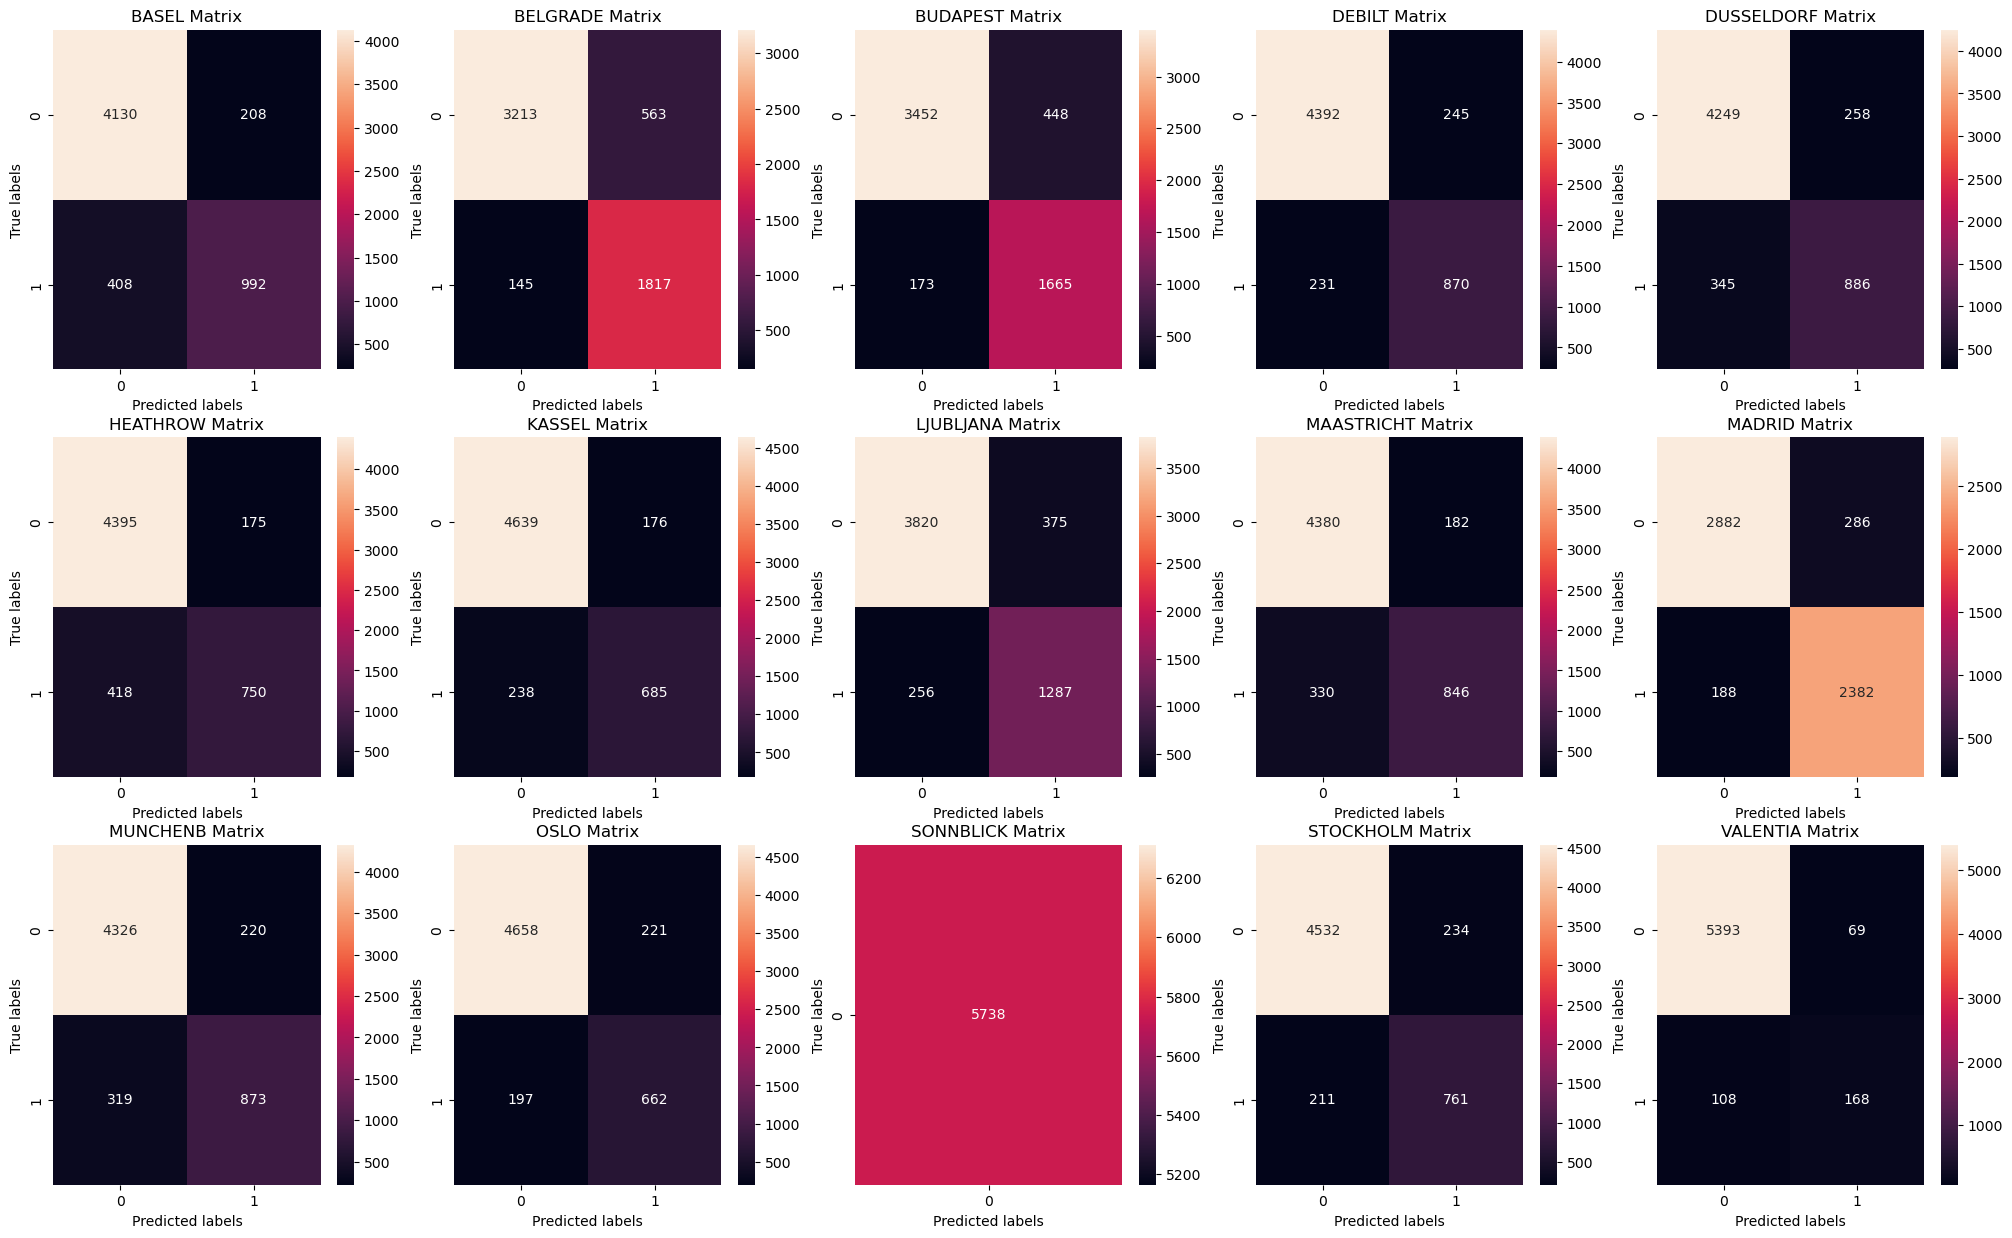

In [131]:
#Confusion matrix of testing data
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1